Función para mostrar resultados

In [1]:
# Graficar histograma de las variables generadas
def show_variates(variates_list,num_bins,title):
  plt.hist(variates_list,bins=num_bins) # Entre mayor número 'bins', más preciso el histograma
  plt.xlabel("Valores")
  plt.ylabel("Frecuencia")
  plt.title(title)
  plt.grid(True)
  plt.show()

Librerías

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Punto 1,a
Generar por el método de la transformada inversa, números al azar que sigan la siguiente distribución de probabilidad:

![Enunciado](images_1/enunciado_a.png)
![Enunciado](images_1/funciones_a.png)

Generación de variables

In [3]:
np.random.seed(0)

# PARÁMETROS DE LA DISTRIBUCIÓN TRIANGULAR
a=3
b=4
c=5

def generator_a_1(a,b,c,rand_u):
  return a + math.sqrt(rand_u*(c-a)*(b-a))

def generator_a_2(a,b,c,rand_u):
  return c - math.sqrt((1-rand_u)*(c-a)*(c-b))

iterations = 1000000
variates_a = []
for i in range(0,iterations):
  rand_u = np.random.uniform(0,1)
  if rand_u <= (b-a)/(c-a):
    variates_a.append(generator_a_1(a,b,c,rand_u))
  else:
    variates_a.append(generator_a_2(a,b,c,rand_u))


Reporte de resultados

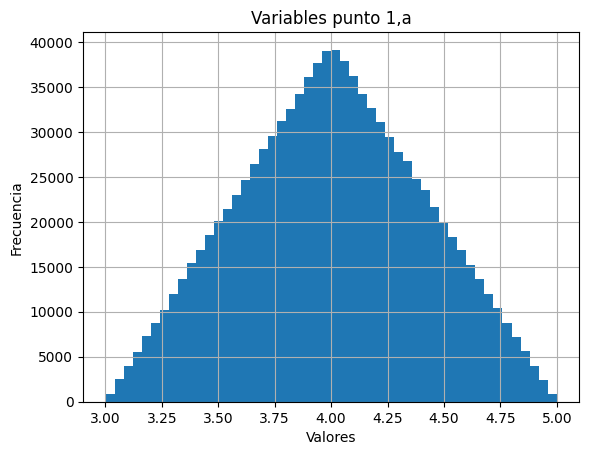

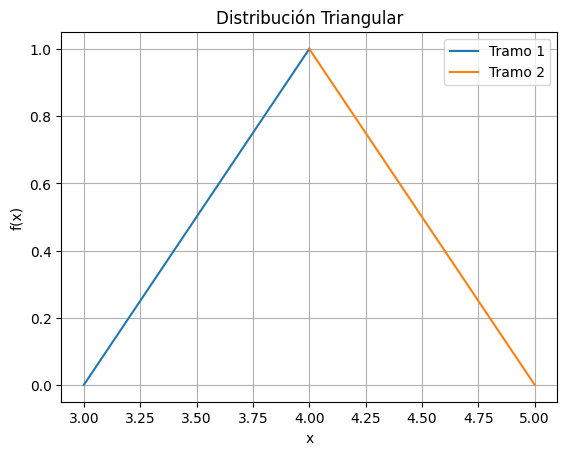

In [4]:
# GRAFICA DE LAS VARIABLES GENERADAS POR TRANSFORMADA INVERSA
show_variates(variates_a,50,"Variables punto 1,a")

# GRAFICA DE LA DISTRIBUCIÓN TRIANGULAR
def funcion1(x,a,b,c):
  return (2*(x-a))/((c-a)*(b-a))

def funcion2(x,a,b,c):
  return (2*(c-x))/((c-a)*(c-b))

dominio_1 = np.linspace(a,b, 100)
dominio_2 = np.linspace(b,c, 100)

# Calcular los puntos para cada tramo
tramo_1 = funcion1(dominio_1,a,b,c)
tramo_2 = funcion2(dominio_2,a,b,c)

# Graficar los tramos
plt.plot(dominio_1, tramo_1, label="Tramo 1")
plt.plot(dominio_2, tramo_2, label="Tramo 2")

# Agregar etiquetas y título
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Distribución Triangular")
plt.legend()
plt.grid(True)  # Add gridlines for better readability (optional)
plt.show()

# Punto 1,c

In [11]:
np.random.seed(0)

# GENERADORES PARA LA DISTRIBUCIÓN RECTANGULAR (F1)
def generator_f1(a,c,rand_u):
  return a + (c - a) * rand_u


# GENERADORES PARA LA DISTRIBUCIÓN TRIANGULAR (F2)
def generator_f2_1(a,b,c,rand_u):
  return a + math.sqrt(rand_u*(c-a)*(b-a))

def generator_f2_2(a,b,c,rand_u):
  return c - math.sqrt((1-rand_u)*(c-a)*(c-b))

def generator_f2(a,b,c,rand_u):
  if rand_u <= (b-a)/(c-a):
    return generator_f2_1(a,b,c,rand_u)
  else:
    return generator_f2_2(a,b,c,rand_u)


# GENERADOR DE LA FUNCIÓN COMPUESTA
def generator_composite_c(num_variates,a,b,c,area_rectangle,area_triangle):
  total_area = area_rectangle + area_triangle
  probability_limit = area_triangle/total_area # Probabilidad límite para usar distribución triangular

  # Correr generación de variables
  variates = []
  for i in range(num_variates):
    u1 = np.random.uniform(0,1)
    u2 = np.random.uniform(0,1)
    if u1 < probability_limit: # Dentro del triaangulo
      variates.append(generator_f2(a,b,c,u2))
    else: # Dentro del rectangulo
      variates.append(generator_f1(a,c,u2))
  
  return variates





# CORRER SIMULACIÓN
# Parámetros de la base de la distribución:
a=8
b=9 # Moda
c=10
num_variates = 1000000
area_rectangle = 1/2
area_triangle = 1/2

variates_c = generator_composite_c(num_variates,a,b,c,area_rectangle,area_triangle)
  


Reporte de resultados

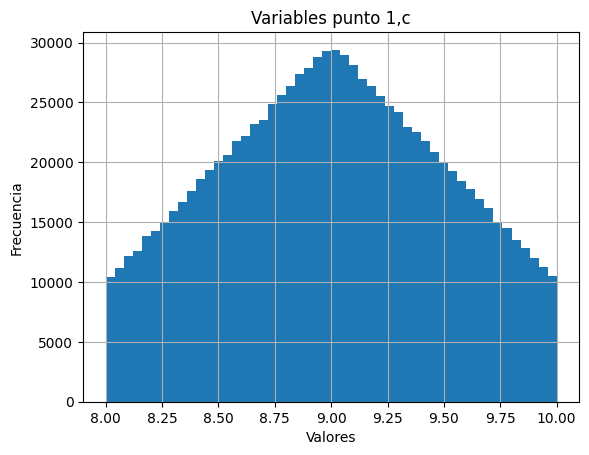

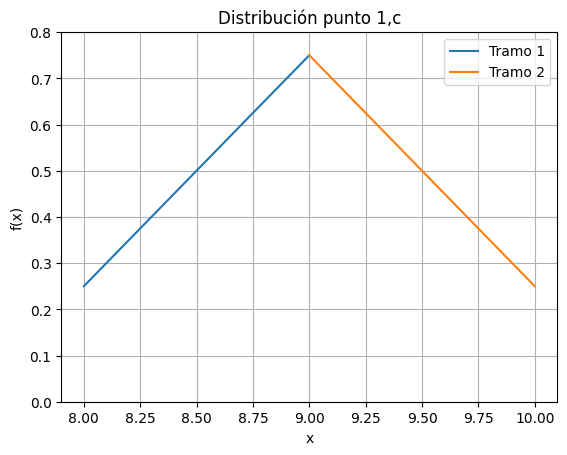

In [14]:
# GRAFICA DE LAS VARIABLES GENERADAS POR COMPOSICIÓN
show_variates(variates_c,50,"Variables punto 1,c")
# GRAFICA DE LA DISTRIBUCIÓN
def funcion1(x):
  return (1/2)*x-(15/4)

def funcion2(x):
  return (-1/2)*x+(21/4)

dominio_1 = np.linspace(8,9, 100)
dominio_2 = np.linspace(9,10, 100)

# Calcular los puntos para cada tramo
tramo_1 = funcion1(dominio_1)
tramo_2 = funcion2(dominio_2)

# Graficar los tramos
plt.plot(dominio_1, tramo_1, label="Tramo 1")
plt.plot(dominio_2, tramo_2, label="Tramo 2")

# Agregar etiquetas y título
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(0, 0.8)
plt.title("Distribución punto 1,c")
plt.legend()
plt.grid(True)  # Add gridlines for better readability (optional)
plt.show()

# Punto 1,b

In [56]:
np.random.seed(0)

# GENERADOR PARA EL TRIANGULO IZQUIERDO
def generator_f1(rand_u):
  return -(-5+np.sqrt(25-32*rand_u))/4

# GENERADOR PARA EL RECTÁNGULO DERECHO
def generator_f2(rand_u):
  return 4*rand_u-2



# GENERADOR DE LA FUNCIÓN COMPUESTA
def generator_b(num_variates):
    variates = []
    
    for i in range(num_variates):
        u = np.random.uniform(0,1)  # Genera un número aleatorio uniforme
        if u <= 3/4: # Dentro del triángulo izquierdo
          variates.append(generator_f1(u))
        else: # Dentro del rectangulo derecho
            variates.append(generator_f2(u))
    
    return variates
  




# CORRER SIMULACIÓN
num_variates = 1000000

variates_b = generator_b(num_variates)

Reporte de resultados

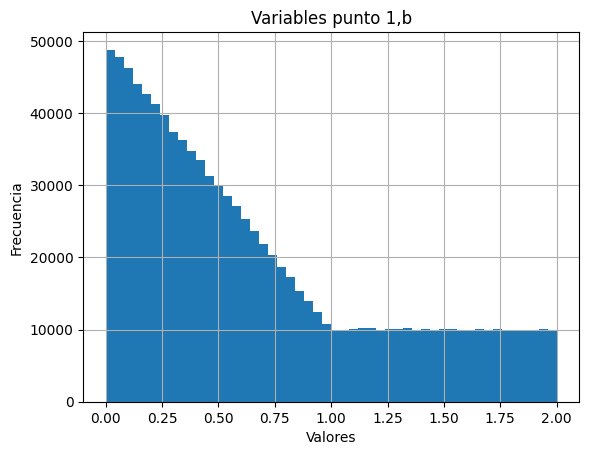

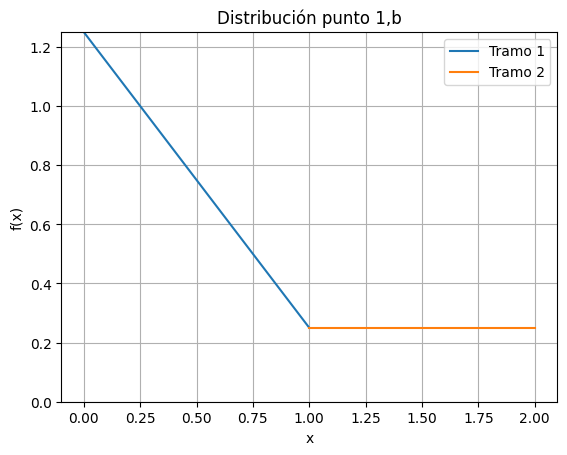

In [59]:
# GRAFICA DE LAS VARIABLES GENERADAS POR COMPOSICIÓN
show_variates(variates_b,50,"Variables punto 1,b")
# GRAFICA DE LA DISTRIBUCIÓN
def funcion1(x):
  return -x+(5/4)

dominio_1 = np.linspace(0,1, 100)
dominio_2 = [1,2]

# Calcular los puntos para cada tramo
tramo_1 = funcion1(dominio_1)
tramo_2 = [1/4,1/4]

# Graficar los tramos
plt.plot(dominio_1, tramo_1, label="Tramo 1")
plt.plot(dominio_2, tramo_2, label="Tramo 2")

# Agregar etiquetas y título
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(0, 5/4)
plt.title("Distribución punto 1,b")
plt.legend()
plt.grid(True)  # Add gridlines for better readability (optional)
plt.show()

# Punto 1,d
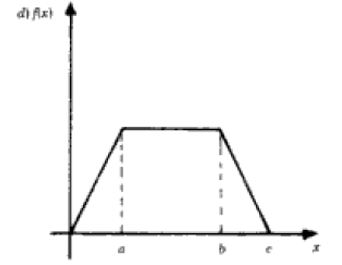

In [22]:
np.random.seed(0)

# GENERADOR PARA EL TRIANGULO IZQUIERDO (F1)
def generator_f1(a,rand_u):
  return np.sqrt((a**2)*rand_u)

# GENERADOR PARA EL RECTÁNGULO CENTRAL (F2)
def generator_f2(a,b,rand_u):
  return a + (b - a) * rand_u

# GENERADOR PARA EL TRIANGULO DERECHO (F3)
def generator_f3(b,c,rand_u):
  return c- np.sqrt(c**2-(rand_u*(c**2))+(2*rand_u*c*b)-(rand_u*(b**2))+(b**2)- (2*c*b))


# GENERADOR DE LA FUNCIÓN COMPUESTA
def generator_composite_d(num_variates,a, b, c):
    # Suponemos que la 'altura' h del trapecio es proporcional a la longitud de la base mayor c.
    # Dividimos el trapecio en tres partes: dos triángulos y un rectángulo.
    altura=2/(c+(b-a))
    area_triangulo_izq = (a * altura) / 2
    area_rectangulo = altura * (b - a)
    area_triangulo_der = (altura * (c - b)) / 2
    # quitar esto?
    area_total = area_triangulo_izq + area_rectangulo + area_triangulo_der 
    variates = []
    
    for i in range(num_variates):
        u1 = np.random.uniform(0,1)  # Genera un número aleatorio uniforme
        u2 = np.random.uniform(0,1)  
        if u1 < area_triangulo_izq: # Dentro del triángulo izquierdo
          variates.append(generator_f1(a,u2))
        elif u1 < area_triangulo_izq + area_rectangulo: # Dentro del rectángulo central
            variates.append(generator_f2(a,b,u2))
        else: # Dentro del triangulo derecho
            variates.append(generator_f3(b,c,u2))
    
    return variates
  




# CORRER SIMULACIÓN
# Parámetros de la base de la distribución:
a=2
b=5
c=7
num_variates = 1000000

variates_d = generator_composite_d(num_variates,a, b, c)


Reporte de resultados

In [25]:
print(2/(c+(b-a)))
print(1/5)

0.2
0.2


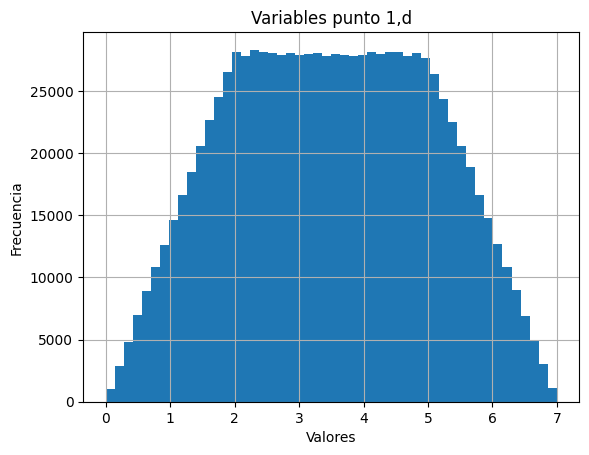

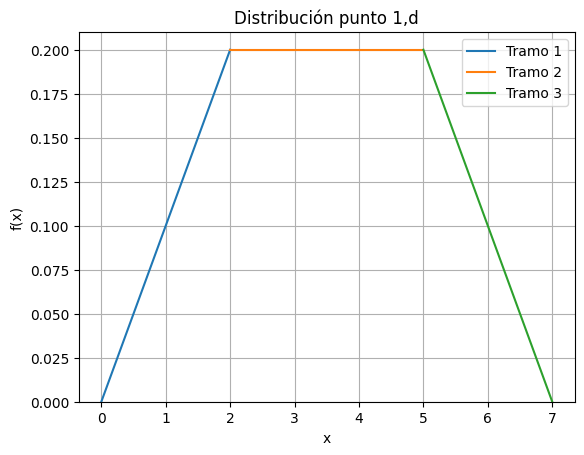

In [30]:
# GRAFICA DE LAS VARIABLES GENERADAS POR COMPOSICIÓN
show_variates(variates_d,50,"Variables punto 1,d")
# GRAFICA DE LA DISTRIBUCIÓN
def funcion1(x):
  return (1/10)*x

def funcion2(x):
  return (-1/10)*x + 7/10

dominio_1 = np.linspace(0,2, 100)
dominio_2 = [2,5]
dominio_3 = np.linspace(5,7, 100)

# Calcular los puntos para cada tramo
tramo_1 = funcion1(dominio_1)
tramo_2 = [1/5,1/5]
tramo_3 = funcion2(dominio_3)

# Graficar los tramos
plt.plot(dominio_1, tramo_1, label="Tramo 1")
plt.plot(dominio_2, tramo_2, label="Tramo 2")
plt.plot(dominio_3, tramo_3, label="Tramo 3")

# Agregar etiquetas y título
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(0, 0.21)
plt.title("Distribución punto 1,d")
plt.legend()
plt.grid(True)  # Add gridlines for better readability (optional)
plt.show()